<a href="https://www.kaggle.com/code/victoraesthete/outlier-detection-and-removal?scriptVersionId=120729417" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 2px; color:white; text-align:center"><b></b></p>
</div>

# <center>Outlier Detection and Removal</center>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 2px; color:white; text-align:center"><b></b></p>
</div>

# **WorkFlow**
> 1. Z Score<br>
> 2. IQR Method<br>
> 3. Percentile Method
#####  Trimming and Capping applied in each method:
### Steps :
a) Overview of each row (Collecting Information)<br>
b) Get Lower bound and Upper Bound for each method<br>
c) View Rows which are not in boundary<br>
d) Trim - Create New Data frame which include all rows which are inside boundary<br>
e) Capping - If any value greater than upper limit change it to upper limit OR If any value less than lower limit change it to lower limit

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')[['reading score','writing score','math score']]

In [3]:
df.head()

,reading score,writing score,math score
0,72,74,72
1,90,88,69
2,95,93,90
3,57,44,47
4,78,75,76


In [4]:
df.shape

(1000, 3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
/opt/conda/

<AxesSubplot:xlabel='math score'>

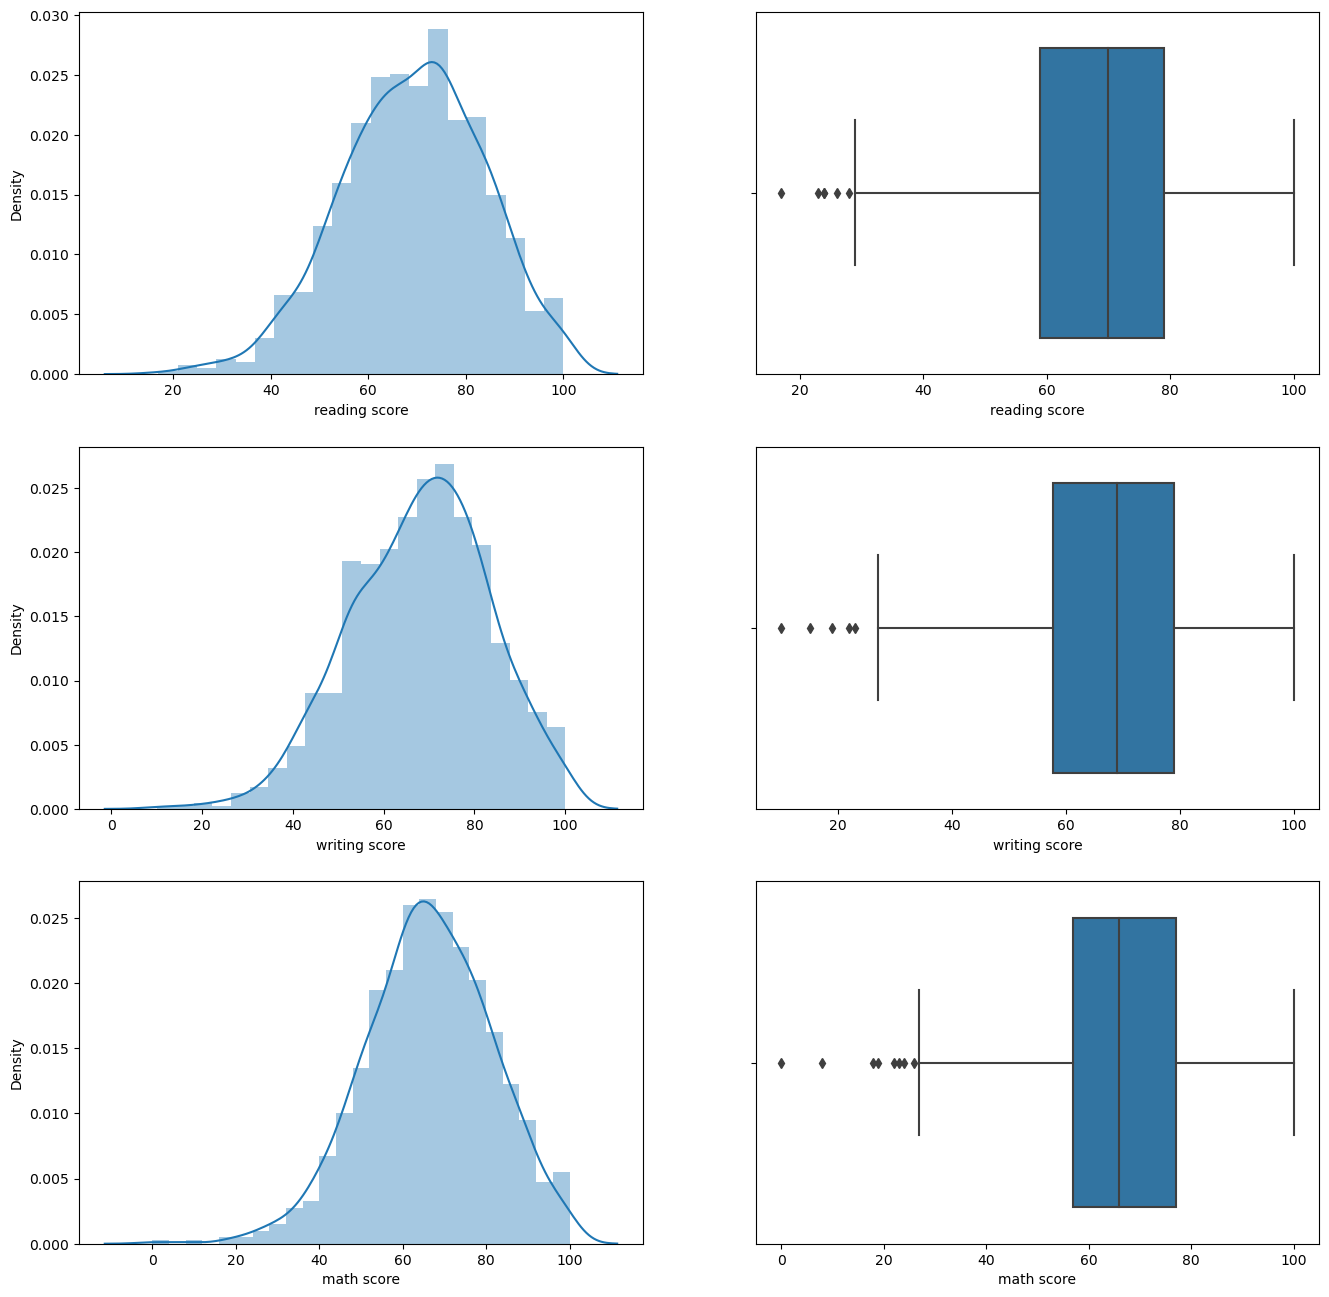

In [5]:
plt.figure(figsize=(16,16))
plt.subplot(321)
sns.distplot(df['reading score'])
plt.subplot(322)
sns.boxplot(x=df['reading score'])
plt.subplot(323)
sns.distplot(df['writing score'])
plt.subplot(324)
sns.boxplot(x=df['writing score'])
plt.subplot(325)
sns.distplot(df['math score'])
plt.subplot(326)
sns.boxplot(x=df['math score'])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px; color:white; text-align:center"><b>Collecting Information</b></p>
</div>

In [6]:
df['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

In [7]:
df['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

In [8]:
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

# 1. Z Score Method

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px; color:white; text-align:center"><b>1. Z Score Method</b></p>
</div>

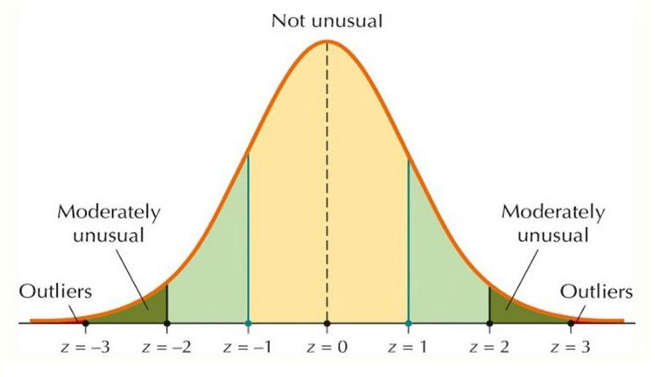

## Z Score
### $ Lower Limit ={\mu - 3*\sigma}$
### $ Upper Limit ={\mu + 3*\sigma}$


In [9]:
upper_lim1=df['reading score'].mean()+3*df['reading score'].std()
lower_lim1=df['reading score'].mean()-3*df['reading score'].std()
print("Upper Limit:",upper_lim1,"\nLower Limit:",lower_lim1)

Upper Limit: 112.96957581175664 
Lower Limit: 25.368424188243353


In [10]:
print("Outliers :")
df[(df['reading score']>upper_lim1) | (df['reading score']<lower_lim1) ]

Outliers :


,reading score,writing score,math score
59,17,10,0
327,23,19,28
596,24,15,30
980,24,23,8


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:azure;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding:1px; color:black; text-align:center"><b>Trimming</b></p>
</div>

In [11]:
new_df_z1=df[(df['reading score']<=upper_lim1) & (df['reading score']>=lower_lim1) ]
new_df_z1

,reading score,writing score,math score
0,72,74,72
1,90,88,69
2,95,93,90
3,57,44,47
4,78,75,76
...,...,...,...
995,99,95,88
996,55,55,62
997,71,65,59
998,78,77,68


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:azure;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding:1px; color:black; text-align:center"><b>Capping</b></p>
</div>

In [12]:
df['reading score']=np.where(df['reading score']>=upper_lim1,upper_lim1,np.where(df['reading score']<=lower_lim1,lower_lim1,df['reading score']))

In [13]:
df

,reading score,writing score,math score
0,72.0,74,72
1,90.0,88,69
2,95.0,93,90
3,57.0,44,47
4,78.0,75,76
...,...,...,...
995,99.0,95,88
996,55.0,55,62
997,71.0,65,59
998,78.0,77,68


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


Text(0.5, 0.98, "After Removing Outlier from 'reading score'")

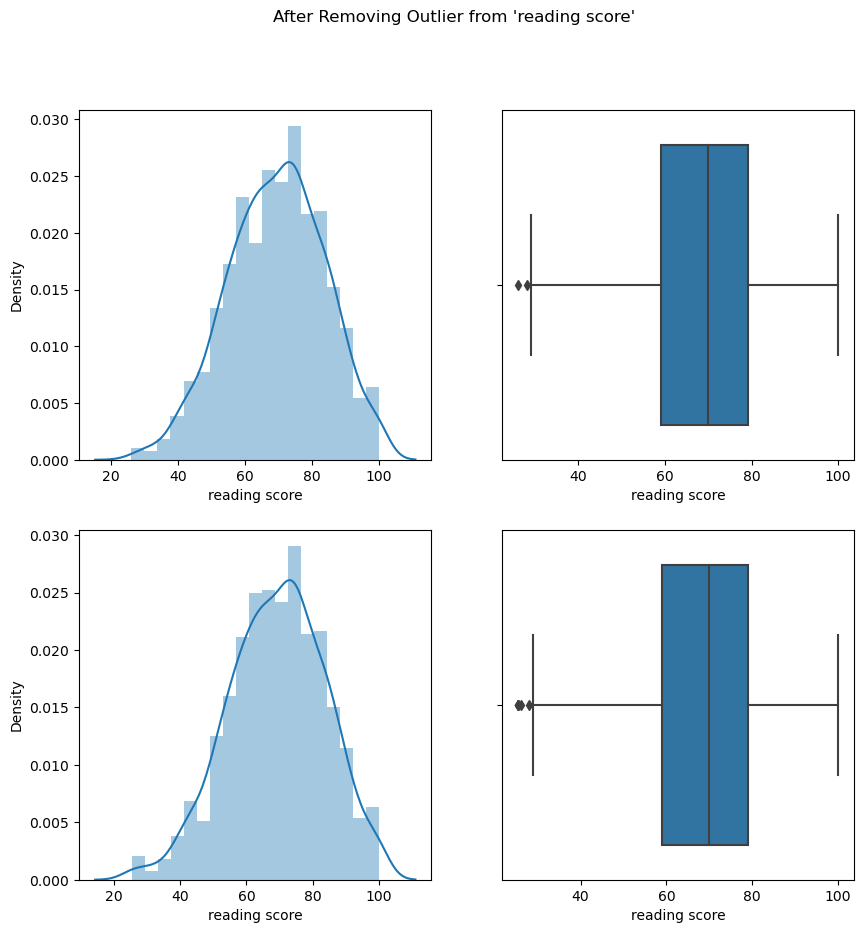

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(new_df_z1['reading score'])
plt.subplot(222)
sns.boxplot(x=new_df_z1['reading score'])
plt.subplot(223)
sns.distplot(df['reading score'])
plt.subplot(224)
sns.boxplot(x=df['reading score'])
plt.suptitle("After Removing Outlier from 'reading score'")

# 2. IQR Method

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px; color:white; text-align:center"><b>2. IQR Method</b></p>
</div>

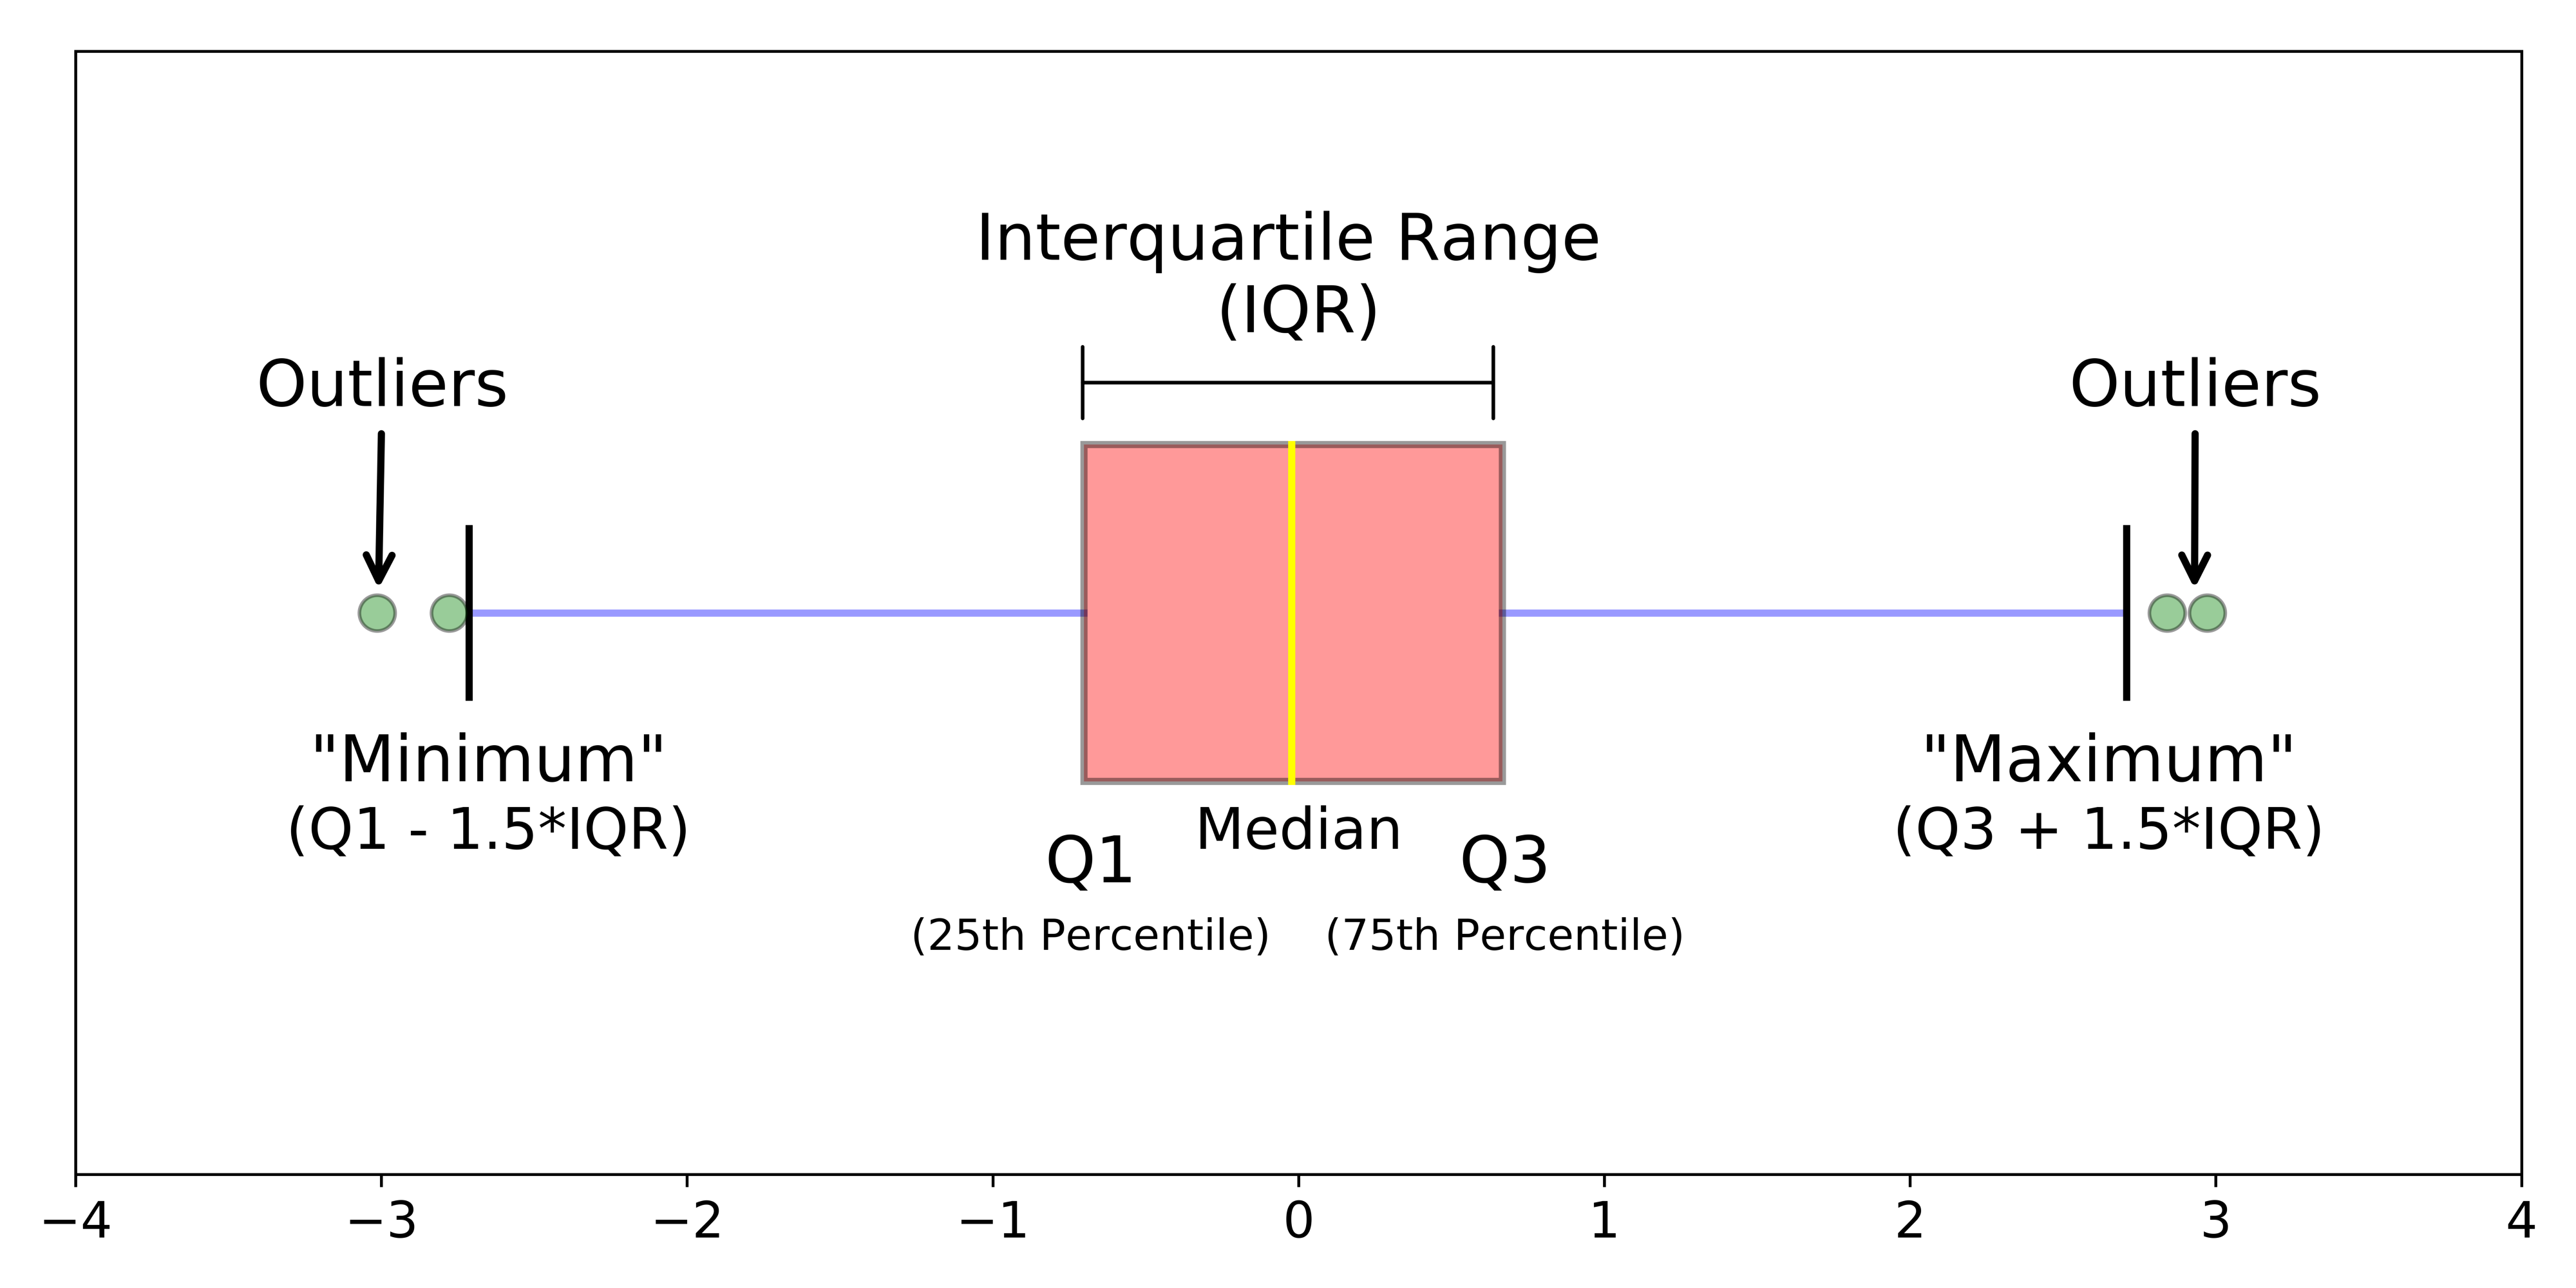

## IQR Method
### $ Lower Limit =25th percentile - 1.5 * IQR $
### $ Upper Limit =75th percentile + 1.5 * IQR $
##### How to get 25th percentile?
#####  df ['col'].quantile(0.25)
#### IQR= 75th percentile - 25th percentile

In [15]:
qr75=df['writing score'].quantile(0.75)
qr25=df['writing score'].quantile(0.25)
iqr=qr75-qr25

In [16]:
lower_lim2=qr25-1.5*iqr
upper_lim2=qr75+1.5*iqr
print("Upper Limit:",upper_lim2,"\nLower Limit:",lower_lim2)

Upper Limit: 110.875 
Lower Limit: 25.875


In [17]:
print('Outlier:')
df[(df['writing score']>upper_lim2) | (df['writing score']<lower_lim2)]

Outlier:


,reading score,writing score,math score
59,25.368424,10,0
76,26.000000,22,30
327,25.368424,19,28
596,25.368424,15,30
980,25.368424,23,8


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:azure;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding:1px; color:black; text-align:center"><b>Trimming</b></p>
</div>

In [18]:
new_df_2=df[(df['writing score']>=lower_lim2) & (df['writing score']<=upper_lim2)]
new_df_2

,reading score,writing score,math score
0,72.0,74,72
1,90.0,88,69
2,95.0,93,90
3,57.0,44,47
4,78.0,75,76
...,...,...,...
995,99.0,95,88
996,55.0,55,62
997,71.0,65,59
998,78.0,77,68


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:azure;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding:1px; color:black; text-align:center"><b>Capping</b></p>
</div>

In [19]:
df['writing score']=np.where(df['writing score']>=upper_lim2,upper_lim2,np.where(df['writing score']<=lower_lim2,lower_lim2,df['writing score']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


Text(0.5, 0.98, "After Removing Outlier from 'writing score'")

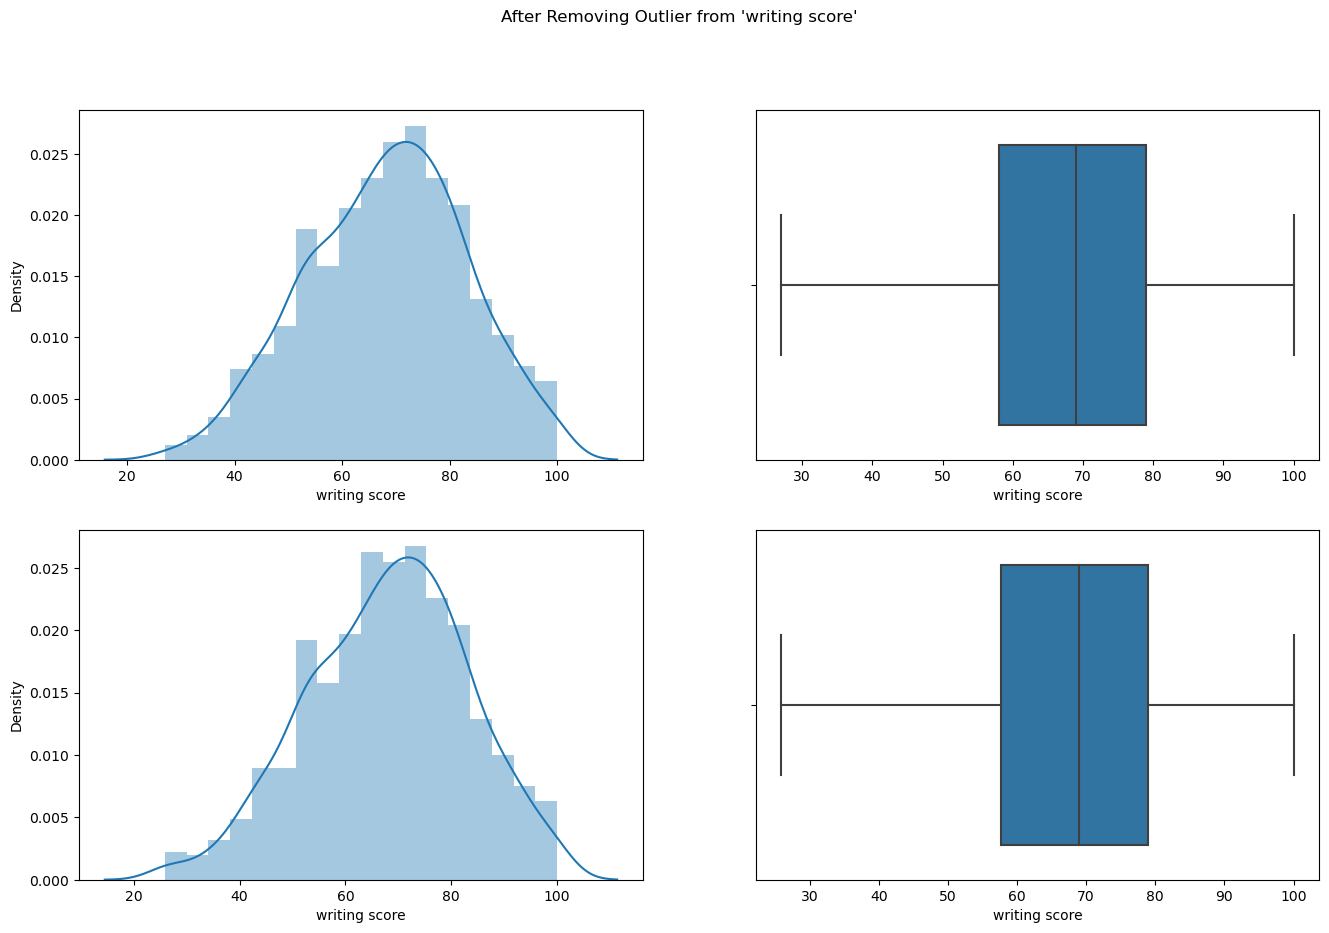

In [20]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.distplot(new_df_2['writing score'])
plt.subplot(222)
sns.boxplot(x=new_df_2['writing score'])
plt.subplot(223)
sns.distplot(df['writing score'])
plt.subplot(224)
sns.boxplot(x=df['writing score'])
plt.suptitle("After Removing Outlier from 'writing score'")

# 3. Percentile Method

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px; color:white; text-align:center"><b>3. Percentile method</b></p>
</div>


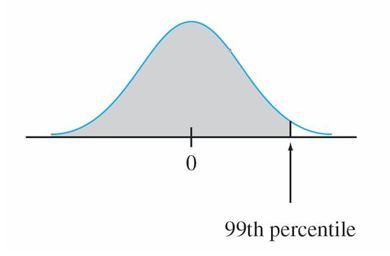

In [21]:
lower_lim3=df['math score'].quantile(0.01)
upper_lim3=df['math score'].quantile(0.99)
print('Lower Limit:',lower_lim3,'\nUpper Limit:',upper_lim3)

Lower Limit: 27.990000000000002 
Upper Limit: 98.00999999999999


In [22]:
df[(df['math score']<lower_lim3) | (df['math score']>upper_lim3)]

,reading score,writing score,math score
17,32.000000,28.000,18
59,25.368424,25.875,0
91,34.000000,36.000,27
114,100.000000,100.000,99
145,39.000000,33.000,22
149,100.000000,93.000,100
263,93.000000,90.000,99
306,87.000000,81.000,99
338,38.000000,27.000,24
363,34.000000,32.000,27


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:azure;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding:1px; color:black; text-align:center"><b>Trimming</b></p>
</div>

In [23]:
new_df_3=df[(df['math score']>lower_lim3) & (df['math score']<upper_lim3)]
new_df_3

,reading score,writing score,math score
0,72.0,74.0,72
1,90.0,88.0,69
2,95.0,93.0,90
3,57.0,44.0,47
4,78.0,75.0,76
...,...,...,...
995,99.0,95.0,88
996,55.0,55.0,62
997,71.0,65.0,59
998,78.0,77.0,68


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:azure;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding:1px; color:black; text-align:center"><b>Capping</b></p>
</div>

In [24]:
df['math score']=np.where(df['math score']>upper_lim3,upper_lim3,np.where(df['math score']<lower_lim3,lower_lim3,df['math score']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


Text(0.5, 0.98, "After Removing Outlier from 'math score'")

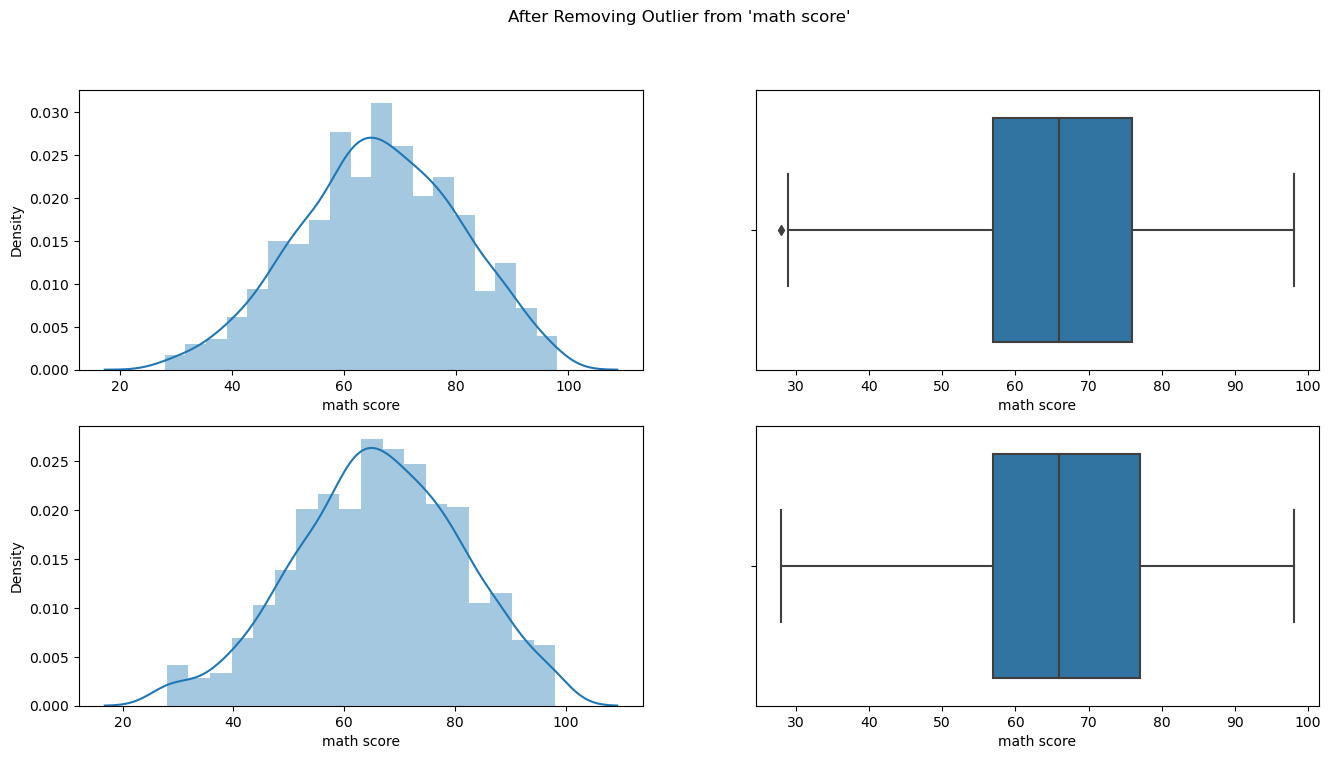

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(new_df_3['math score'])
plt.subplot(222)
sns.boxplot(x=new_df_3['math score'])
plt.subplot(223)
sns.distplot(df['math score'])
plt.subplot(224)
sns.boxplot(x=df['math score'])
plt.suptitle("After Removing Outlier from 'math score'")